# CPSC 330 - Applied Machine Learning 

## Homework 6: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: Wednesday, March 15, 2023 at 11:59pm**

## Table of contents

- [Submission instructions](#si)
- [Understanding the problem](#1)
- [Data splitting](#2)
- [EDA](#3)
- (Optional) [Feature engineering](#4)
- [Preprocessing and transformations](#5)
- [Baseline model](#6)
- [Linear models](#7)
- [Different classifiers](#8)
- (Optional) [Feature selection](#9)
- [Hyperparameter optimization](#10)
- [Interpretation and feature importances](#11)
- [Results on the test set](#12)
- (Optional) [Explaining predictions](#13)
- [Summary of the results](#14)

## Imports 

In [251]:
import os

%matplotlib inline
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    plot_confusion_matrix,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC

<br><br>

## Instructions 
<hr>
rubric={points:2}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2022W2/blob/main/docs/homework_instructions.md). 

**You may work on this homework in a group and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 3. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).

<br><br>

## Introduction <a name="in"></a>
<hr>

At this point we are at the end of supervised machine learning part of the course. So in this homework, you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips

1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). **Make sure you explain your decisions whenever necessary.** 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 
4. If you are having trouble running models on your laptop because of the size of the dataset, you can create your train/test split in such a way that you have less data in the train split. If you end up doing this, please write a note to the grader in the submission explaining why you are doing it.  

#### Assessment

We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.

#### A final note

Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (2-8 hours???) is a good guideline for a typical submission. Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

## 1. Understanding the problem <a name="1"></a>
<hr>
rubric={points:4}

In this mini project, you will be working on a classification problem of predicting whether a customer will cancel the reservation they have made at a hotel. 
For this problem, you will use [Reservation Cancellation Prediction Dataset](https://www.kaggle.com/datasets/gauravduttakiit/reservation-cancellation-prediction?select=train__dataset.csv). In this data set, there are about 18.000 examples and 18 features (including the target), and the goal is to estimate whether a person will cancel their booking; this column is labeled "booking_status" in the data (1 = canceled). 

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on [the dataset page on Kaggle](https://www.kaggle.com/datasets/gauravduttakiit/reservation-cancellation-prediction?select=train__dataset.csv). Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 

In [252]:
reso_cancel_df_test = pd.read_csv('./test___dataset.csv')
reso_cancel_df_train = pd.read_csv('./train__dataset.csv')

In [253]:
reso_cancel_df_test.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,0,1,0,65,2018,3,28,1,0,0,0,96.3,0
1,2,0,0,2,0,0,0,322,2018,12,9,0,0,0,0,52.0,0
2,1,0,2,3,0,0,0,115,2018,2,27,0,0,0,0,75.0,0
3,2,0,2,0,2,0,0,386,2018,10,23,1,0,0,0,115.0,1
4,2,0,1,4,0,0,1,51,2018,8,31,1,0,0,0,123.3,0


In [254]:
reso_cancel_df_train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,4,0,0,0,118,2017,12,28,1,0,0,0,110.80,2,0
1,2,1,0,2,0,0,0,17,2018,4,14,1,0,0,0,145.00,0,1
2,1,0,1,5,0,0,0,349,2018,10,4,0,0,0,0,96.67,0,1
3,1,0,2,4,0,0,0,69,2018,6,12,0,0,0,0,120.00,0,1
4,2,0,0,4,1,0,0,11,2018,1,20,1,0,0,0,69.50,1,0


In [255]:
'booking_status' in reso_cancel_df_test.columns

False

In [256]:
print(f'training shape {reso_cancel_df_train.shape}')
print(f'testing shape {reso_cancel_df_test.shape}')

training shape (18137, 18)
testing shape (18138, 17)


<br><br>

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train and test portions. 

In [257]:
train_df, test_df = train_test_split(reso_cancel_df_train, test_size=0.2, random_state=42)

X_train = train_df.drop(columns=["booking_status"])
X_test = test_df.drop(columns=["booking_status"])

y_train = train_df["booking_status"]
y_test = test_df["booking_status"]


<br><br>

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

**ANSWER:**
1. EDA is below

2.  
    1. The `mean` was helpful because I could gauge the scale of each of the numeric variables to see that scaling will be required for preprocessing
    2. Additionally, `min` and `max` helped me identify features that didn't seem to be numeric, for example features that had min and max as 0 and 1 respectively; this was further confirmed using plots and checking their unique values. 
    1. The `pie` plot helped me identify that there is a bit of a class imbalance. There are around twice as many examples in which customers did not cancel, compared to cancelled.
    2. The `histograms` helped me see the distribution of numeric features. Additionally, these distributions helped me identify features that were rather categorical and more specifically binary if their distribution and names were focused on distinct whole numbers.

3. My initial observation is that there are no `null` values in the dataset. Additionally, although all of the features are represented numerically, there are several features that are categorical and binary which will be considered for preprocessing. There is a slight class imbalance which may influence which statistic is best to score the model, and whether `class_weight` could be used.

4. In this problem, the positive classification is when `booking_status=1` or when the customer cancelled. For a problem predicting whether customer will cancel the reservation at a hotel, it would be better to incorrectly classify them as "not cancel" (False Negative) than to classify them as "cancel" but they don't end up cancelling (False Positive). This is because if for example the hotel wants to predict that a customers will cancel so that they can plan to fill in the cancellation with another customer, if the prediction was a False Positive and the customer didn't actually cancel, they may deal with conflict due to the double-booking. However, if they predicted that a customer won't cancel but they end up cancelling, the hotel will not dissatisfy customers. I am assuming that the hotel values customer satisfaction. 

Therefore `precision` is important, which evaluates how many of the positively identified examples were actually positive.

Additionally, I believe `recall` is important as we would still like to identify as many customers that will cancel as possible. So the scoring metric I will is the `f1-score` which combines both `recall` and `precision`.



In [258]:
scoring_metric = "f1"

In [259]:
pd.set_option('display.max_columns', None)
train_df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,14509.0,1.846509,0.519085,0.0,2.0,2.00,2.00,4.0
no_of_children,14509.0,0.106279,0.408933,0.0,0.0,0.00,0.00,9.0
no_of_weekend_nights,14509.0,0.811841,0.876599,0.0,0.0,1.00,2.00,7.0
no_of_week_nights,14509.0,2.210421,1.432677,0.0,1.0,2.00,3.00,17.0
type_of_meal_plan,14509.0,0.317045,0.628103,0.0,0.0,0.00,0.00,3.0
required_car_parking_space,14509.0,0.032049,0.176137,0.0,0.0,0.00,0.00,1.0
room_type_reserved,14509.0,0.333931,0.765390,0.0,0.0,0.00,0.00,6.0
lead_time,14509.0,85.450479,86.678056,0.0,17.0,57.00,127.00,443.0
arrival_year,14509.0,2017.818182,0.385708,2017.0,2018.0,2018.00,2018.00,2018.0
arrival_month,14509.0,7.439382,3.087926,1.0,5.0,8.00,10.00,12.0


In [260]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14509 entries, 10715 to 15795
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          14509 non-null  int64  
 1   no_of_children                        14509 non-null  int64  
 2   no_of_weekend_nights                  14509 non-null  int64  
 3   no_of_week_nights                     14509 non-null  int64  
 4   type_of_meal_plan                     14509 non-null  int64  
 5   required_car_parking_space            14509 non-null  int64  
 6   room_type_reserved                    14509 non-null  int64  
 7   lead_time                             14509 non-null  int64  
 8   arrival_year                          14509 non-null  int64  
 9   arrival_month                         14509 non-null  int64  
 10  arrival_date                          14509 non-null  int64  
 11  market_segm

In [261]:
print(f'train size {train_df.shape[0]}')
print(f'num features including target')

train size 14509
num features including target


number of booking_status = 1: 4749
number of booking_status = 0: 9760
percentage 1: 0.32731408091529396
percentage 0: 0.6726859190847061


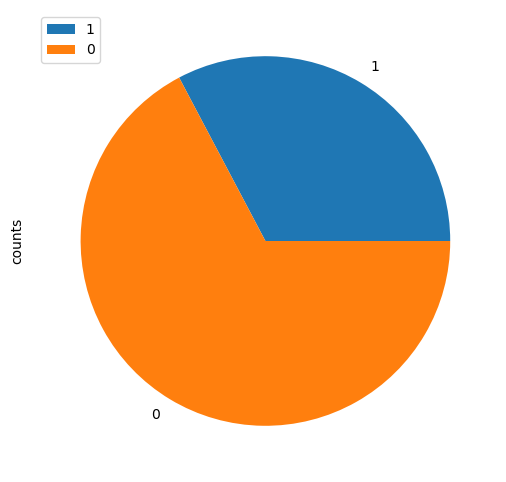

In [262]:
count_1 = train_df['booking_status'].loc[train_df.booking_status == 1].count()
count_0 = train_df['booking_status'].loc[train_df.booking_status == 0].count()
total_count = train_df['booking_status'].count()
print(f'number of booking_status = 1: {count_1}')
print(f'number of booking_status = 0: {count_0}')
print(f'percentage 1: {count_1 / total_count}')
print(f'percentage 0: {count_0 / total_count}')

target_count_df = pd.DataFrame(
    {
        'counts': [
            count_1, 
            count_0
        ]
    },
    index=['1', '0']
)

target_count_plot = target_count_df.plot.pie(subplots=True, figsize=(11, 6))

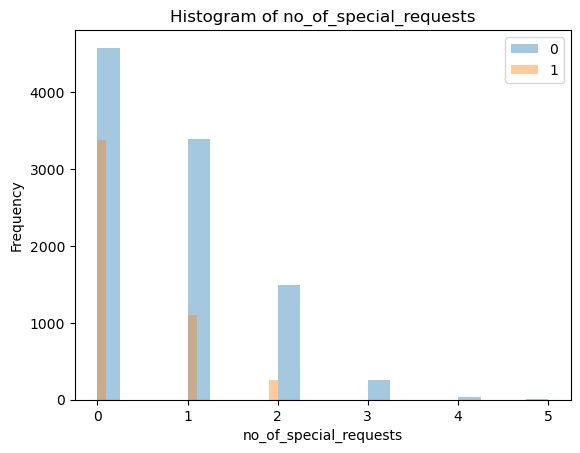

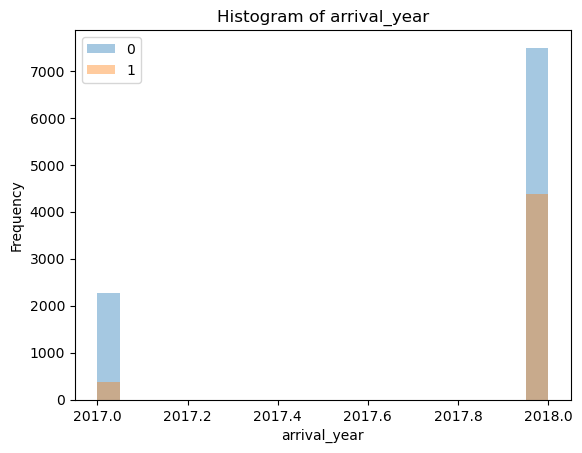

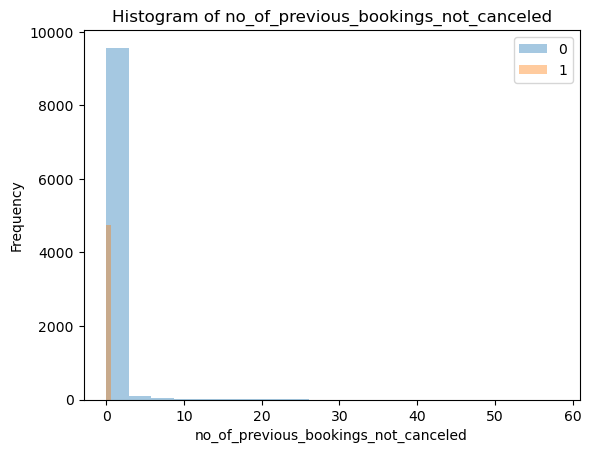

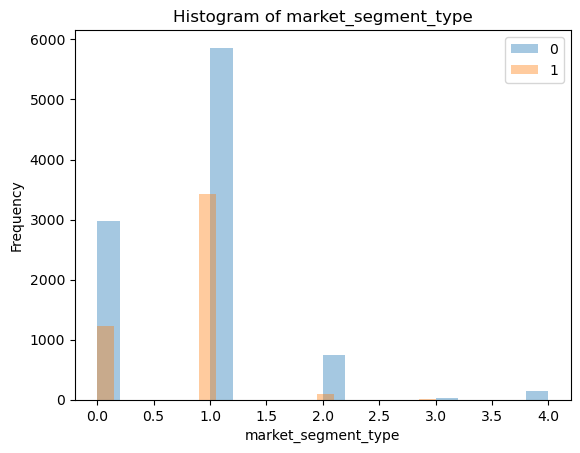

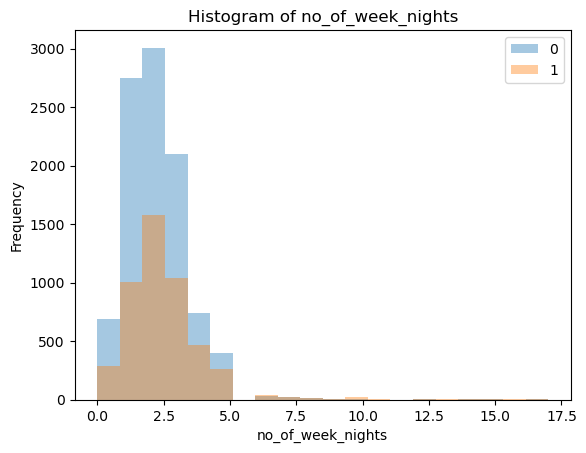

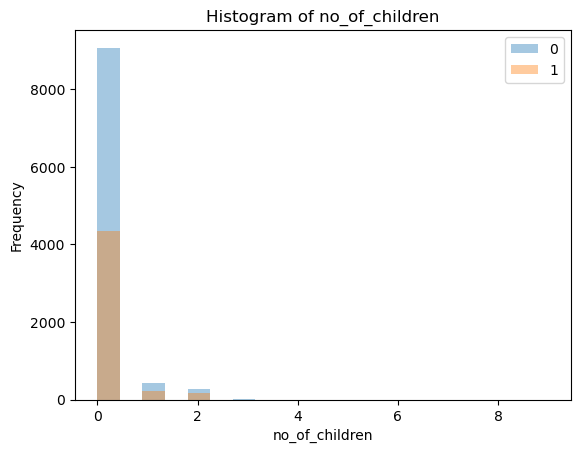

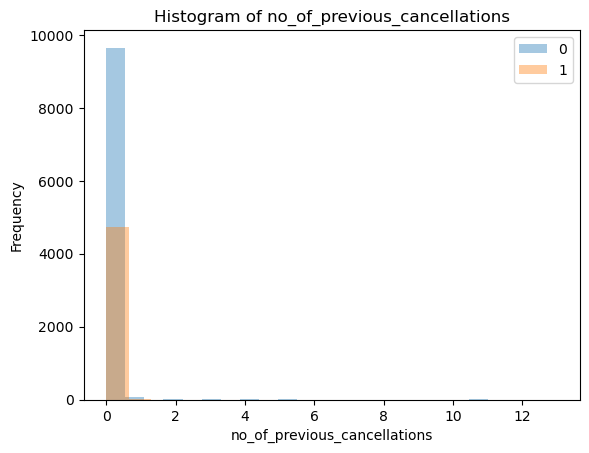

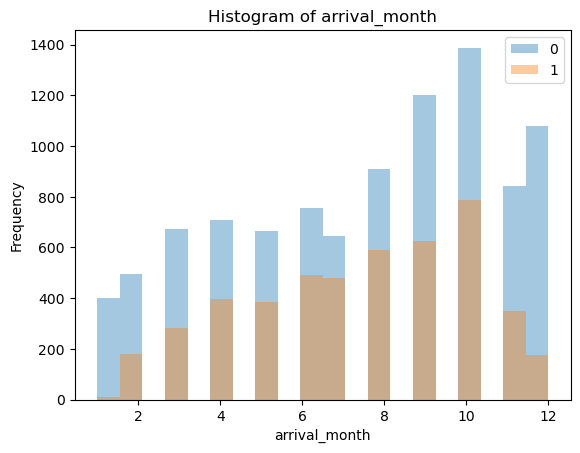

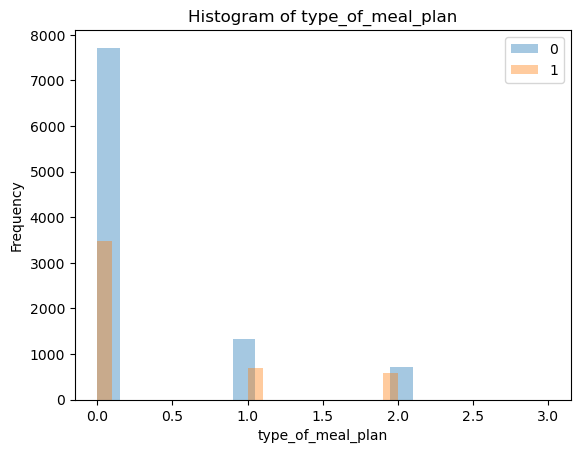

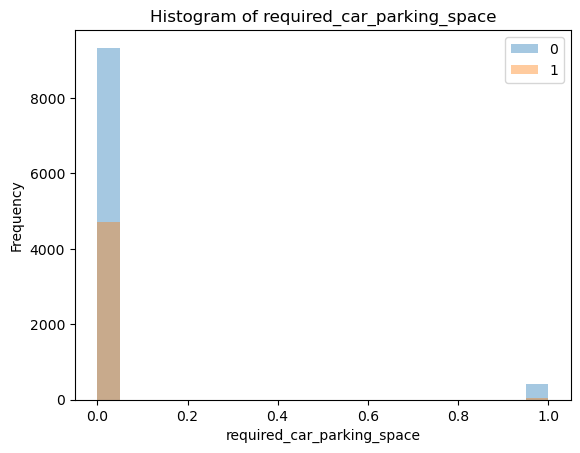

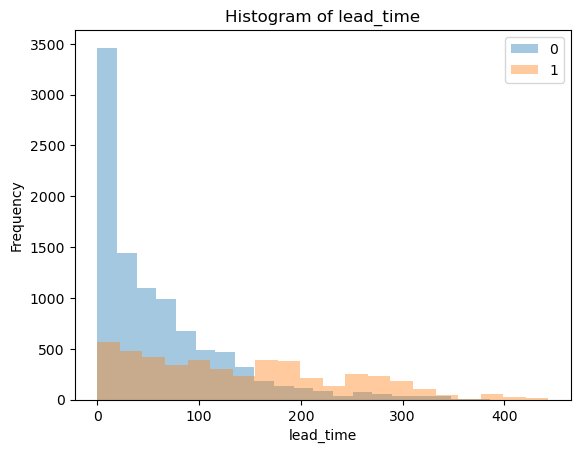

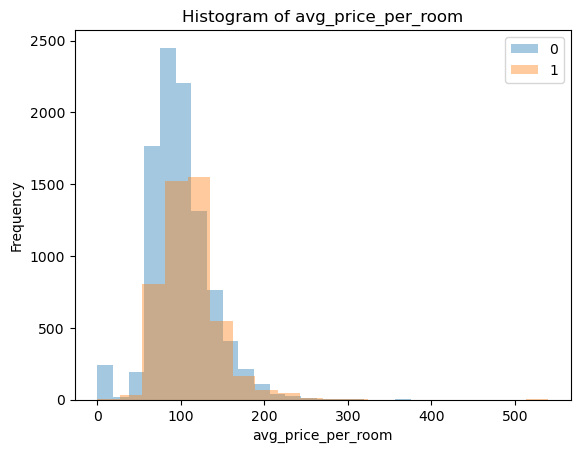

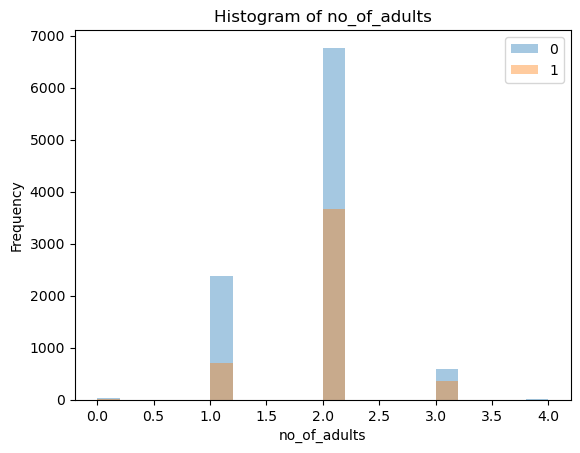

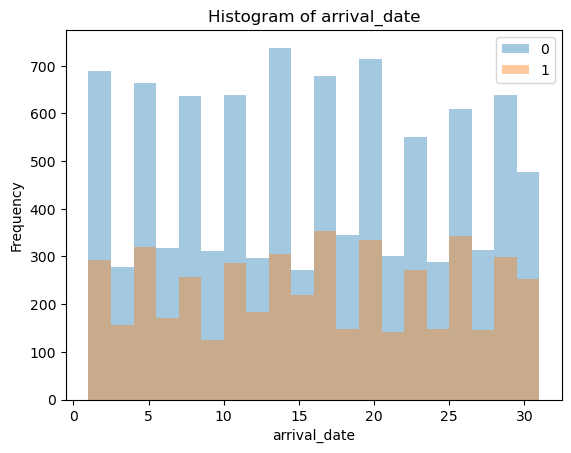

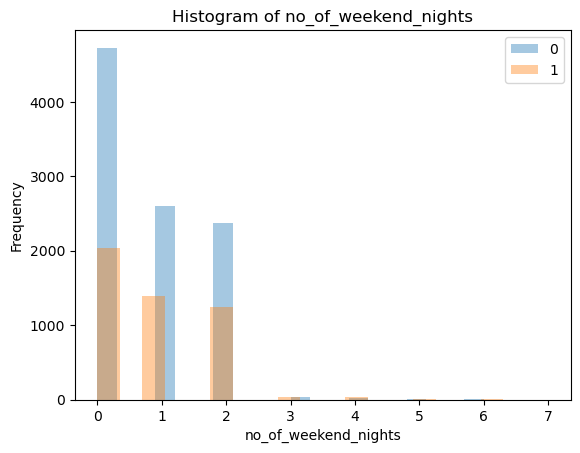

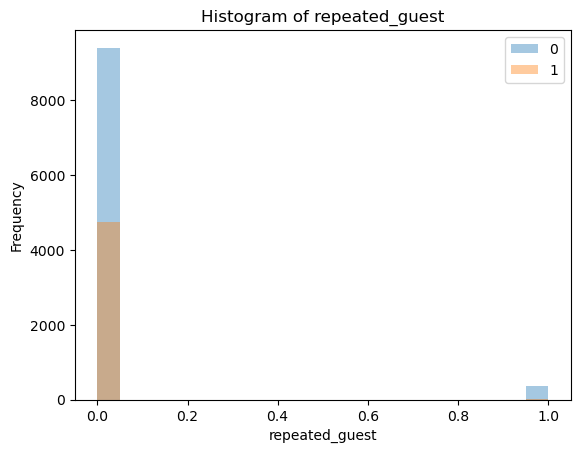

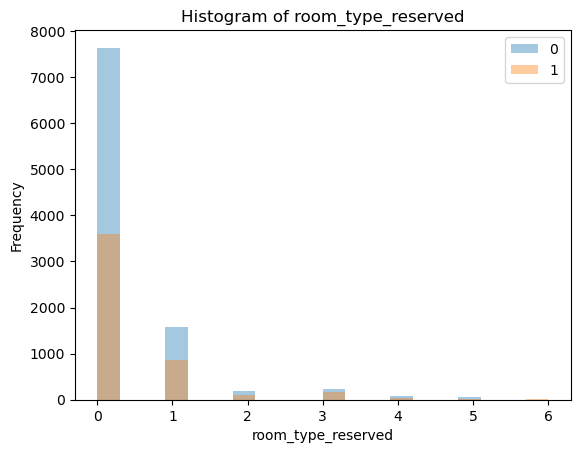

In [263]:
feats = train_df.columns.tolist()
for feat in set(feats) - set(['booking_status']):
    ax = train_df.groupby("booking_status")[feat].plot.hist(bins=20, alpha=0.4, legend=True)
    plt.xlabel(feat)
    plt.title("Histogram of " + feat)
    plt.show()

In [264]:
print(f'unique years: {str(train_df["arrival_year"].unique())}')
print(f'unique months: {str(np.sort(train_df["arrival_month"].unique()))}')
print(f'unique date: {str(train_df["arrival_date"].unique())}')
print(f'unique require car space: {str(train_df["required_car_parking_space"].unique())}')
print(f'unique repeated guests: {str(train_df["repeated_guest"].unique())}')
print(f'unique room type: {str(train_df["room_type_reserved"].unique())}')
print(f'unique meal type: {str(train_df["type_of_meal_plan"].unique())}')
print(f'unique market segment: {str(train_df["market_segment_type"].unique())}')

unique years: [2018 2017]
unique months: [ 1  2  3  4  5  6  7  8  9 10 11 12]
unique date: [ 3 23  2 16 11 29  1 18 14  9 22 24  8 17  6  5  7 27 12 10 15 25 26 13
 19 20  4 30 28 31 21]
unique require car space: [0 1]
unique repeated guests: [0 1]
unique room type: [0 1 4 3 2 5 6]
unique meal type: [0 2 1 3]
unique market segment: [1 0 2 3 4]


<br><br>

## (Optional) 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<br><br>

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

**ANSWER:**

1. Feature types are defined below resulting from my EDA. I have decided to use `arrival_year` and `arrival_month` as a categorical variable because I believe ranges of time sufficiently large like year and month (and correspondingly season) could have some correspondance with cancellation.


In [265]:
print(len(X_train.columns.tolist()))
print(X_train.columns)

17
Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')


In [266]:
numeric_features = [
    'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
    'no_of_week_nights', 'lead_time', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
    'avg_price_per_room', 'no_of_special_requests'
]

categorical_non_binary_features = [
    'type_of_meal_plan',
    'room_type_reserved',
    'market_segment_type',
    'arrival_year',
    'arrival_month'
]

categorical_binary_features = [
    'required_car_parking_space',
    'repeated_guest',
]

drop_features = [
    'arrival_date'
]

categorical_features = categorical_non_binary_features + categorical_binary_features

In [267]:
numeric_transformer = make_pipeline(StandardScaler())

categorical_transformer = make_pipeline(
    OneHotEncoder(handle_unknown="ignore", sparse=False)
)

binary_transformer = make_pipeline(
    OneHotEncoder(drop="if_binary")
)

preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (categorical_transformer, categorical_non_binary_features),
    (binary_transformer, categorical_binary_features),
    ("drop", drop_features),
)

In [268]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['no_of_adults', 'no_of_children',
                                  'no_of_weekend_nights', 'no_of_week_nights',
                                  'lead_time', 'no_of_previous_cancellations',
                                  'no_of_previous_bookings_not_canceled',
                                  'avg_price_per_room',
                                  'no_of_special_requests']),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['type_of_meal_plan', 'room_type_reserved',
                                  'market_segment_type', 'arrival_year',
                                  'arrival_month']),
                                ('pipeline-3',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'))]),
                                 ['required_car_parking_space',
                                  'repeated_guest']),
                                ('drop', 'drop', ['arrival_date'])])

<br><br>

## 6. Baseline model <a name="6"></a>
<hr>

rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

**ANSWER:**

I have chosen to use the `uniform` strategy because if I used `most_frequent` or `prior`, the prediction would always be `0` which is the negative classification. Therefore, the baseline `precision = 0` and `recall = 0` because there are no True Positives.

In [269]:
# This function was borrowed from lecture utils
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation
    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data
    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [270]:
results = {}

In [271]:
dummy_pipe = make_pipeline(preprocessor, DummyClassifier(strategy="uniform", random_state=42))
results["Dummy"] = mean_std_cross_val_scores(
    dummy_pipe, X_train, y_train, return_train_score=True, scoring=scoring_metric
)
pd.DataFrame(results).T


,fit_time,score_time,test_score,train_score
Dummy,0.008 (+/- 0.001),0.003 (+/- 0.000),0.403 (+/- 0.014),0.399 (+/- 0.005)


<br><br>

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:12}

**Your tasks:**

1. Try logistic regression as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter `C`. 
3. Report validation scores along with standard deviation. 
4. Summarize your results.

**ANSWER:**

1. Used LogisticRegression with balanced class weights due to the class imbalance. Included `max_iter` parameter to help model convergence.

2. Best `C=0.01`

3. Scores reported below

4. The low fluctuation between cross validation train score and also validation score indicate that the model is not making random predictions. However, the train score and validation score are both low around `0.70` which may indicate that this model is underfit.

    Additionally, I tried to do hyperparameter tuning with `class_weight` for curiosity. The performance of the best model with `C=0.1` and `class_weight={0:1, 1:2}` with performance very similar to my first optimization with `C=1.0` and `class_weight=balanced`. This tells me that balancing the class weight definitely makes the model perform better than having unbalanced classes.

In [304]:
pipe_lr = make_pipeline(preprocessor, LogisticRegression(class_weight='balanced', max_iter=1000))

In [305]:
param_grid = {
    "logisticregression__C": np.logspace(-5, 5, 11),
}

grid_search = GridSearchCV(
    pipe_lr, param_grid, cv=5, n_jobs=-1, return_train_score=True, scoring=scoring_metric
)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['no_of_adults',
                                                                          'no_of_children',
                                                                          'no_of_weekend_nights',
                                                                          'no_of_week_nights',
                                                                          'lead_time',
                                                                          'no_of_previous_cancellations',
                                                                          'no_of_previous_bookings_not_canceled',
                                                                          'avg_price_per_room',
                                                                          'no_of...
                                                                                          OneHotEncoder(drop='if_binary'))]),
                                                                         ['required_car_parking_space',
                                                                          'repeated_guest']),
                                                                        ('drop',
                                                                         'drop',
                                                                         ['arrival_date'])])),
                                       ('logisticregression',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=1000))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05])},
             return_train_score=True, scoring='f1')

In [274]:
print(f'best score: {grid_search.best_score_}')
print(f'best param: {grid_search.best_params_}')

best score: 0.7023018362012529
best param: {'logisticregression__C': 0.01}


In [306]:
best_pipe_lr = make_pipeline(preprocessor, LogisticRegression(class_weight='balanced', max_iter=1000, C=0.01))
results["LogisticRegression"] = mean_std_cross_val_scores(best_pipe_lr, X_train, y_train, return_train_score=True, scoring=scoring_metric)
pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
Dummy,0.008 (+/- 0.001),0.003 (+/- 0.000),0.403 (+/- 0.014),0.399 (+/- 0.005)
LogisticRegression,0.038 (+/- 0.004),0.004 (+/- 0.000),0.702 (+/- 0.007),0.704 (+/- 0.003)
LogisticRegression cw optimized,0.044 (+/- 0.016),0.005 (+/- 0.000),0.703 (+/- 0.008),0.706 (+/- 0.003)
RandomForest,0.568 (+/- 0.019),0.039 (+/- 0.003),0.811 (+/- 0.012),0.993 (+/- 0.000)
CatBoost,3.244 (+/- 0.060),0.029 (+/- 0.007),0.809 (+/- 0.005),0.855 (+/- 0.002)
KNeighborsClassifier,0.010 (+/- 0.004),0.055 (+/- 0.002),0.733 (+/- 0.008),0.814 (+/- 0.003)
RandomForest RandomSearchOptimized,0.486 (+/- 0.009),0.036 (+/- 0.001),0.814 (+/- 0.012),0.938 (+/- 0.003)
RandomForest GridSearchOptimized,2.030 (+/- 0.115),0.033 (+/- 0.004),0.813 (+/- 0.011),0.980 (+/- 0.003)


In [298]:
def printCVSummary(scores):
    print(f'train scores: {str(scores["train_score"])}')
    print(f'mean train score: {np.mean(scores["train_score"])}')
    print(f'std train score: {np.std(scores["train_score"])}')
    print(f'\n validation scores: {str(scores["test_score"])}')
    print(f'mean validation score: {np.mean(scores["test_score"])}')
    print(f'mean validation score: {np.std(scores["test_score"])}')

In [299]:
scores = cross_validate(best_pipe_lr, X_train, y_train, return_train_score=True, scoring=scoring_metric)
printCVSummary(scores)

train scores: [0.70377828 0.70274119 0.70295858 0.70473703 0.70100651]
mean train score: 0.7030443178143118
std train score: 0.0012374051905330863

 validation scores: [0.69552941 0.70257157 0.7024205  0.6970684  0.71247059]
mean validation score: 0.7020120948388275
mean validation score: 0.0059384366729634125


In [300]:
param_grid = {
    "logisticregression__C": np.logspace(-5, 5, 11),
    "logisticregression__class_weight": [None, { 0:1, 1:2}, {0:1, 1:3}, 'balanced'],
}

grid_search = GridSearchCV(
    pipe_lr, param_grid, cv=5, n_jobs=-1, return_train_score=True, scoring=scoring_metric
)
grid_search.fit(X_train, y_train)
print(f'best score: {grid_search.best_score_}')
print(f'best param: {grid_search.best_params_}')

best score: 0.7033447243080332
best param: {'logisticregression__C': 0.01, 'logisticregression__class_weight': {0: 1, 1: 2}}


In [307]:
best_pipe_lr_cw_optimized = make_pipeline(preprocessor, LogisticRegression(class_weight={0: 1, 1: 2}, max_iter=1000, C=0.01))
results["LogisticRegression cw optimized"] = mean_std_cross_val_scores(best_pipe_lr_cw_optimized, X_train, y_train, return_train_score=True, scoring=scoring_metric)
pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
Dummy,0.008 (+/- 0.001),0.003 (+/- 0.000),0.403 (+/- 0.014),0.399 (+/- 0.005)
LogisticRegression,0.038 (+/- 0.004),0.004 (+/- 0.000),0.702 (+/- 0.007),0.704 (+/- 0.003)
LogisticRegression cw optimized,0.035 (+/- 0.007),0.004 (+/- 0.001),0.703 (+/- 0.008),0.706 (+/- 0.003)
RandomForest,0.568 (+/- 0.019),0.039 (+/- 0.003),0.811 (+/- 0.012),0.993 (+/- 0.000)
CatBoost,3.244 (+/- 0.060),0.029 (+/- 0.007),0.809 (+/- 0.005),0.855 (+/- 0.002)
KNeighborsClassifier,0.010 (+/- 0.004),0.055 (+/- 0.002),0.733 (+/- 0.008),0.814 (+/- 0.003)
RandomForest RandomSearchOptimized,0.486 (+/- 0.009),0.036 (+/- 0.001),0.814 (+/- 0.012),0.938 (+/- 0.003)
RandomForest GridSearchOptimized,2.030 (+/- 0.115),0.033 (+/- 0.004),0.813 (+/- 0.011),0.980 (+/- 0.003)


In [308]:
scores = cross_validate(best_pipe_lr_cw_optimized, X_train, y_train, return_train_score=True, scoring=scoring_metric)
printCVSummary(scores)

train scores: [0.7103589  0.70466819 0.70677415 0.70268328 0.70416767]
mean train score: 0.7057304379653747
std train score: 0.002659617168021661

 validation scores: [0.69903846 0.69594924 0.70520231 0.70033034 0.71620326]
mean validation score: 0.7033447243080332
mean validation score: 0.00708683411396776


<br><br>

## 8. Different classifiers <a name="8"></a>
<hr>
rubric={points:15}

**Your tasks:**
1. Try at least 3 other models aside from logistic regression. At least one of these models should be a tree-based ensemble model (e.g., lgbm, random forest, xgboost). 
2. Summarize your results. Can you beat logistic regression? 

**ANSWER:**

1. I will be trying `RandomForestClassifier`, `CatBoost`, and `KNeighborsClassifier`.

2. All 3 of these other models performed with higher training scores. Additionally, all 3 models had low fluctuations in their scores which indicated that they weren't predicting randomly or based on a random pattern.

`Knn` with default parameters of `n_neighbors=5` had a small improvement in validation score compared to `LogisticRegression`. But `RandomForest` and `CatBoost` had a more significant improvement in validation score. 

`RandomForest` may be overfitting as its training score is extremely high with a larger gap between the training and validation scores.

`CatBoost`, although with slightly lower validation score than `RandomForest`, has a much smaller gap between training and validation score, so I would say `CatBoost` with default hyperparameters performed the best.

In [281]:
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

In [282]:
pipe_rf = make_pipeline(preprocessor, RandomForestClassifier(random_state=42))
pipe_catboost = make_pipeline(preprocessor, CatBoostClassifier(verbose=0, random_state=42))
pipe_knn = make_pipeline(preprocessor, KNeighborsClassifier())

In [283]:
results["RandomForest"] = mean_std_cross_val_scores(pipe_rf, X_train, y_train, return_train_score=True, scoring=scoring_metric)
results["CatBoost"] = mean_std_cross_val_scores(pipe_catboost, X_train, y_train, return_train_score=True, scoring=scoring_metric)
results["KNeighborsClassifier"] = mean_std_cross_val_scores(pipe_knn, X_train, y_train, return_train_score=True, scoring=scoring_metric)

In [284]:
pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
Dummy,0.008 (+/- 0.001),0.003 (+/- 0.000),0.403 (+/- 0.014),0.399 (+/- 0.005)
LogisticRegression,0.114 (+/- 0.013),0.004 (+/- 0.000),0.702 (+/- 0.007),0.703 (+/- 0.001)
LogisticRegression cw optimized,0.066 (+/- 0.006),0.004 (+/- 0.001),0.703 (+/- 0.007),0.704 (+/- 0.002)
RandomForest,0.568 (+/- 0.019),0.039 (+/- 0.003),0.811 (+/- 0.012),0.993 (+/- 0.000)
CatBoost,3.244 (+/- 0.060),0.029 (+/- 0.007),0.809 (+/- 0.005),0.855 (+/- 0.002)
KNeighborsClassifier,0.010 (+/- 0.004),0.055 (+/- 0.002),0.733 (+/- 0.008),0.814 (+/- 0.003)


In [285]:
scores = cross_validate(pipe_rf, X_train, y_train, return_train_score=True, scoring=scoring_metric)
printCVSummary(scores)

train scores: [0.99273927 0.99260824 0.99301068 0.99327088 0.99273736]
mean train score: 0.992873285742619
std train score: 0.00023817890432677096

 validation scores: [0.80804785 0.81657459 0.81574631 0.7920354  0.82451253]
mean validation score: 0.8113833360473277
mean validation score: 0.010989345937262229


In [286]:
scores = cross_validate(pipe_catboost, X_train, y_train, return_train_score=True, scoring=scoring_metric)
printCVSummary(scores)

train scores: [0.85612105 0.85102881 0.85702536 0.85529574 0.85318711]
mean train score: 0.8545316124349622
std train score: 0.0021636211091775105

 validation scores: [0.80261011 0.81144781 0.80944536 0.8077135  0.81538462]
mean validation score: 0.8093202798679977
mean validation score: 0.004217256696170802


In [287]:
scores = cross_validate(pipe_knn, X_train, y_train, return_train_score=True, scoring=scoring_metric)
printCVSummary(scores)

train scores: [0.81000403 0.81554982 0.81146876 0.81804714 0.81359144]
mean train score: 0.8137322382630525
std train score: 0.0028623285080898505

 validation scores: [0.74252137 0.73667029 0.73390558 0.72264355 0.7291441 ]
mean validation score: 0.7329769779377726
mean validation score: 0.006738974731692274


<br><br>

## (Optional) 9. Feature selection <a name="9"></a>
<hr>
rubric={points:1}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<br><br>

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:15}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. You may pick one of the best performing models from the previous exercise and tune hyperparameters only for that model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize)

In [288]:
'''
Originally, I wanted to try optimizing CatBoost, but it ran for almost 30 minutes and still didn't finish so I gave up for time and my computer's sake.
'''
# https://catboost.ai/en/docs/references/training-parameters/common
# https://docs.aws.amazon.com/sagemaker/latest/dg/catboost-tuning.html#:~:text=Tunable%20CatBoost%20hyperparameters
# param_grid = {
#     "catboostclassifier__learning_rate": np.linspace(0, 1, 10),
#     "catboostclassifier__l2_leaf_reg": [1, 3, 10, 50, 100],
#     "catboostclassifier__depth": [3, 6, 9, 12, 15],
#     "catboostclassifier__random_strength": [1.0, 3.0, 9.0, 20.0]
# }

# pipe_catboost = make_pipeline(preprocessor, CatBoostClassifier(verbose=0, random_state=42))
# random_search = RandomizedSearchCV(
#     pipe_catboost, param_distributions=param_grid, n_jobs=-1, n_iter=20, cv=5, random_state=42
# )
# random_search.fit(X_train, y_train)

"\nOriginally, I wanted to try optimizing CatBoost, but it ran for almost 30 minutes and still didn't finish so I gave up for time and my computer's sake.\n"

In [289]:
param_grid = {
    "randomforestclassifier__n_estimators": [50, 100, 200, 500],
    "randomforestclassifier__max_depth": [None, 5, 10, 15, 20],
    "randomforestclassifier__max_features": [None, "sqrt", "log2"]
}

pipe_catboost = make_pipeline(preprocessor, RandomForestClassifier(random_state=42))
random_search = RandomizedSearchCV(
    pipe_catboost, param_distributions=param_grid, n_jobs=-1, n_iter=20, cv=5, random_state=42
)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['no_of_adults',
                                                                                'no_of_children',
                                                                                'no_of_weekend_nights',
                                                                                'no_of_week_nights',
                                                                                'lead_time',
                                                                                'no_of_previous_cancellations',
                                                                                'no_of_previous_bookings_not_canceled',
                                                                                'avg_price_per_room',...
                                                                                'repeated_guest']),
                                                                              ('drop',
                                                                               'drop',
                                                                               ['arrival_date'])])),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'randomforestclassifier__max_depth': [None,
                                                                              5,
                                                                              10,
                                                                              15,
                                                                              20],
                                        'randomforestclassifier__max_features': [None,
                                                                                 'sqrt',
                                                                                 'log2'],
                                        'randomforestclassifier__n_estimators': [50,
                                                                                 100,
                                                                                 200,
                                                                                 500]},
                   random_state=42)

In [290]:
print(f'best score: {random_search.best_score_}')
print(f'best param: {random_search.best_params_}')

best score: 0.885175244354771
best param: {'randomforestclassifier__n_estimators': 200, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 20}


In [291]:
pipe_catboost = make_pipeline(preprocessor, RandomForestClassifier(random_state=42))
grid_search = GridSearchCV(
    pipe_catboost, param_grid, n_jobs=-1, cv=5, return_train_score=True, scoring=scoring_metric
)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['no_of_adults',
                                                                          'no_of_children',
                                                                          'no_of_weekend_nights',
                                                                          'no_of_week_nights',
                                                                          'lead_time',
                                                                          'no_of_previous_cancellations',
                                                                          'no_of_previous_bookings_not_canceled',
                                                                          'avg_price_per_room',
                                                                          'no_of...
                                                                          'repeated_guest']),
                                                                        ('drop',
                                                                         'drop',
                                                                         ['arrival_date'])])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': [None, 5, 10, 15,
                                                               20],
                         'randomforestclassifier__max_features': [None, 'sqrt',
                                                                  'log2'],
                         'randomforestclassifier__n_estimators': [50, 100, 200,
                                                                  500]},
             return_train_score=True, scoring='f1')

In [292]:
print(f'best score: {grid_search.best_score_}')
print(f'best param: {grid_search.best_params_}')

best score: 0.8178157872937009
best param: {'randomforestclassifier__max_depth': 20, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__n_estimators': 500}


In [309]:
best_pipe_rf_random = make_pipeline(preprocessor, RandomForestClassifier(random_state=42, n_estimators=200, max_features='sqrt', max_depth=20))
results["RandomForest RandomSearchOptimized"] = mean_std_cross_val_scores(best_pipe_rf_random, X_train, y_train, return_train_score=True, scoring=scoring_metric)

best_pipe_rf_grid = make_pipeline(preprocessor, RandomForestClassifier(random_state=42, n_estimators=500, max_features='sqrt', max_depth=20))
results["RandomForest GridSearchOptimized"] = mean_std_cross_val_scores(best_pipe_rf_grid, X_train, y_train, return_train_score=True, scoring=scoring_metric)
pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
Dummy,0.008 (+/- 0.001),0.003 (+/- 0.000),0.403 (+/- 0.014),0.399 (+/- 0.005)
LogisticRegression,0.038 (+/- 0.004),0.004 (+/- 0.000),0.702 (+/- 0.007),0.704 (+/- 0.003)
LogisticRegression cw optimized,0.035 (+/- 0.007),0.004 (+/- 0.001),0.703 (+/- 0.008),0.706 (+/- 0.003)
RandomForest,0.568 (+/- 0.019),0.039 (+/- 0.003),0.811 (+/- 0.012),0.993 (+/- 0.000)
CatBoost,3.244 (+/- 0.060),0.029 (+/- 0.007),0.809 (+/- 0.005),0.855 (+/- 0.002)
KNeighborsClassifier,0.010 (+/- 0.004),0.055 (+/- 0.002),0.733 (+/- 0.008),0.814 (+/- 0.003)
RandomForest RandomSearchOptimized,1.075 (+/- 0.061),0.068 (+/- 0.005),0.816 (+/- 0.012),0.943 (+/- 0.003)
RandomForest GridSearchOptimized,2.597 (+/- 0.062),0.163 (+/- 0.008),0.818 (+/- 0.011),0.943 (+/- 0.003)


<br><br>

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:15}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to explain feature importances of one of the best performing models. Summarize your observations. 

**ANSWER**:

As the RandomForestClassifier is not a linear model, the feature importance does not have a sign, and therefore doesn't not indicate that an increase of an 'important' feature will necessarily make it more likely to predict 'positive' or cancelled `booking_status`. This means that an important feature may have significant contribution to the model's prediction, but it may cause the prediction to be both more or less likely dependending on the value.

From the weights shown by `eli5`, we can see that some of the most important features in predicting `booking_status` are: `lead_time`, `avg_price_per_room`, and `market_segment_type_1`.

This seems reasonable for `lead_time` because the longer away the booking is, the greater the probability that changes in plan could happen that may influence `booking_status`.

Additionally, the price of a room definitely could be a major contributing factor for many reasons. One of which could be that expensive rooms are more likely to be cancelled if customers can find cheaper alternatives. Or conversely, expensive rooms may be less likely to be cancelled as the fee for cancellation could be greater.

Also, it seems that one of the market segments that customers were divided into has a significant contribution to predicting `booking_status` using our model. Although we are not told what each market segment exactly corresponds to as they are represented numerically, we can assume that there are characteristics (e.g. socioeconomic, psychological, etc.) that represent the market segment that make their `booking_status` more predictable according to the training data and our model.

Not surprisingly, the `arrival_year` and `arrival_month` have very little importance on predicting `booking_status`. However, one exception seems to be `arrival_month_12` which has a much more significant weight compared to the other months. In the month of December, due to holidays, travel conflicts due to weather, and other reasons, it is reasonable that this time of the year can influence `booking_status`.

In [310]:
import eli5

In [311]:

ohe_feats = (
    preprocessor.named_transformers_["pipeline-2"]
    .named_steps["onehotencoder"]
    .get_feature_names_out(categorical_non_binary_features)
).tolist()

feature_names = numeric_features + ohe_feats + categorical_binary_features
feature_names

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'lead_time',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests',
 'type_of_meal_plan_0',
 'type_of_meal_plan_1',
 'type_of_meal_plan_2',
 'type_of_meal_plan_3',
 'room_type_reserved_0',
 'room_type_reserved_1',
 'room_type_reserved_2',
 'room_type_reserved_3',
 'room_type_reserved_4',
 'room_type_reserved_5',
 'room_type_reserved_6',
 'market_segment_type_0',
 'market_segment_type_1',
 'market_segment_type_2',
 'market_segment_type_3',
 'market_segment_type_4',
 'arrival_year_2017',
 'arrival_year_2018',
 'arrival_month_1',
 'arrival_month_2',
 'arrival_month_3',
 'arrival_month_4',
 'arrival_month_5',
 'arrival_month_6',
 'arrival_month_7',
 'arrival_month_8',
 'arrival_month_9',
 'arrival_month_10',
 'arrival_month_11',
 'arrival_month_12',
 'required_car_parking_space',
 'repeated_guest']

In [312]:
best_pipe_rf = make_pipeline(preprocessor, RandomForestClassifier(random_state=42, n_estimators=100, max_features=None, max_depth=20))
best_pipe_rf.fit(X_train, y_train)
eli5.explain_weights(
    best_pipe_rf.named_steps["randomforestclassifier"], feature_names=feature_names,
    
)

Weight,Feature
0.3689 ± 0.0210,lead_time
0.1762 ± 0.0187,avg_price_per_room
0.0952 ± 0.0148,market_segment_type_1
0.0711 ± 0.0103,no_of_special_requests
0.0473 ± 0.0092,no_of_week_nights
0.0387 ± 0.0082,no_of_weekend_nights
0.0314 ± 0.0108,no_of_adults
0.0263 ± 0.0074,arrival_month_12
0.0092 ± 0.0034,arrival_month_4
0.0081 ± 0.0063,arrival_year_2017


<br><br>

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:5}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 

**ANSWER:**
1. Although the highest validation score model is my optimized `RandomForestClassifier`, I am also going to test using `CatBoost` as the discrepancy between validation and training score seems better for `CatBoost`. Also the two models' validation scores are not significantly different.
2. Surprisingly, the test scores are actually higher than the validation scores. Additionally, the testing score for CatBoost and RandomForest are extremely similar, which was also the case for their validation scores.

    However, I do not fully trust the results. This is because my results could suffer from optimization bias. One source of optimization bias is overfitting when conducting hyper-parameter tuning which is something I was afraid of when I saw the larger discrepancy between training and validation scores for `RandomForestClassifier`. 

In [313]:
pipe_catboost.fit(X_train, y_train)
best_pipe_rf_grid.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['no_of_adults',
                                                   'no_of_children',
                                                   'no_of_weekend_nights',
                                                   'no_of_week_nights',
                                                   'lead_time',
                                                   'no_of_previous_cancellations',
                                                   'no_of_previous_bookings_not_canceled',
                                                   'avg_price_per_room',
                                                   'no_of_special_requests']),
                                                 ('pipel...
                                                  ['type_of_meal_plan',
                                                   'room_type_reserved',
                                                   'market_segment_type',
                                                   'arrival_year',
                                                   'arrival_month']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary'))]),
                                                  ['required_car_parking_space',
                                                   'repeated_guest']),
                                                 ('drop', 'drop',
                                                  ['arrival_date'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=20, n_estimators=500,
                                        random_state=42))])

In [314]:
print(f'CatBoost testing score: {pipe_catboost.score(X_test, y_test)}')
print(f'RandomForect Optimized testing score: {best_pipe_rf_grid.score(X_test, y_test)}')

CatBoost testing score: 0.8996692392502756
RandomForect Optimized testing score: 0.9029768467475193


## (Optional) 13. Explaining predictions 
rubric={points:1}

**Your tasks**

1. Take one or two test predictions and explain them with SHAP force plots.  

<br><br>

## 14. Summary of results <a name="13"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Report your final test score along with the metric you used. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 

**ANSWER:**
1. My final test score is `0.9030` from `RandomForestClassifier` which had its hyper-parameters tuned using the `f1-score` scoring metric.
2. Although my final test score is quite high, it is also rather unexpected and unusual as it is higher than my validationg score. Although this is unusual, it may be both due to random chance and hyper-parameter tuning that my model was able to learn some generalizable patterns from the training data, which by chance generalized very well to the test data. I do have some mis-trust with my model due to a bit of a discrepancy between the validation score and training score, which may have resulted in overfitting. However, due to such positive test results, overfitting seems less likely to have occurred, although it would be better to re-run my analysis using different randomization seeds or train/test split ratios. Finally, due to the feature importance being rather reasonable and interesting, I believe my model has at the bare minimum captured some sensible and generalizible patterns that could be improved with more iteration.
3. Other ideas I could try to improve performance/interpretability
    - Create an ensemble (Voting/Stacking) of linear classifiers -> may improve both performance and interpretability
    - Create an ensemble using a combination of the best linear and non-linear classifiers -> may improve performance
    - Validate my findings using other random states and train/test split ratios -> improve interpretability and although unlikely, possibly performance
    - Perform hyper-parameter tuning on more powerful non-linear classifiers such as `CatBoost` given more time, and powerful computing -> improve performance

<br><br><br><br>

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 